2. Exploratory Data Analysis (EDA)
Author: Faith

This notebook performs exploratory and statistical analysis on the cleaned Mental Health in Tech dataset.

Our objective is to:

Understand key patterns and relationships between demographic/workplace factors and mental health treatment-seeking behavior.

Focus specifically on respondents from the United States, where data on state and employment type is more complete.

Use the insights gained here to guide the development of a Streamlit-based predictive application, which will estimate the likelihood that a person may need to seek mental health treatment.

This analysis helps ensure that the features we use in our model are meaningful, relevant, and grounded in the observed data trends.

In [1]:
# 📥 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [2]:
# 📂 Step 2: Load the Cleaned Dataset
df = pd.read_csv('../data/final/survey_cleaned.csv')
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,Il,No,No,Yes,Often,6-25,...,Yes,Somewhat Easy,No,No,Some Of Them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.0,Male,United States,In,No,No,No,Rarely,More Than 1000,...,Don'T Know,Don'T Know,Maybe,No,No,No,No,No,Don'T Know,No
2,2014-08-27 11:29:44,32.0,Male,Canada,Not Applicable,No,No,No,Rarely,6-25,...,Don'T Know,Somewhat Difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,Not Applicable,No,Yes,Yes,Often,26-100,...,No,Somewhat Difficult,Yes,Yes,Some Of Them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.0,Male,United States,Tx,No,No,No,Never,100-500,...,Don'T Know,Don'T Know,No,No,Some Of Them,Yes,Yes,Yes,Don'T Know,No


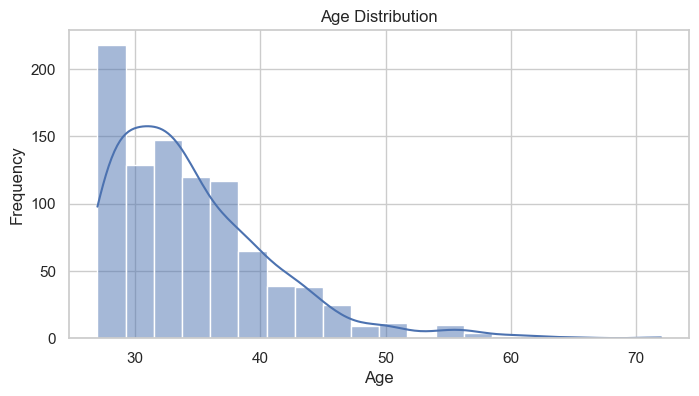

In [3]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Standardize gender values
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'cis-woman']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)


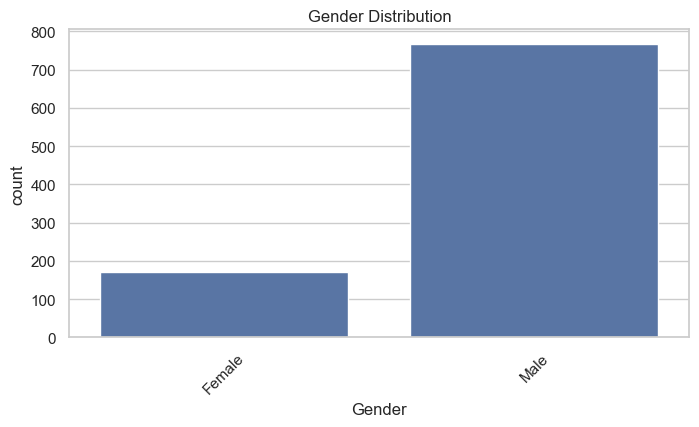

In [5]:
# Gender Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()


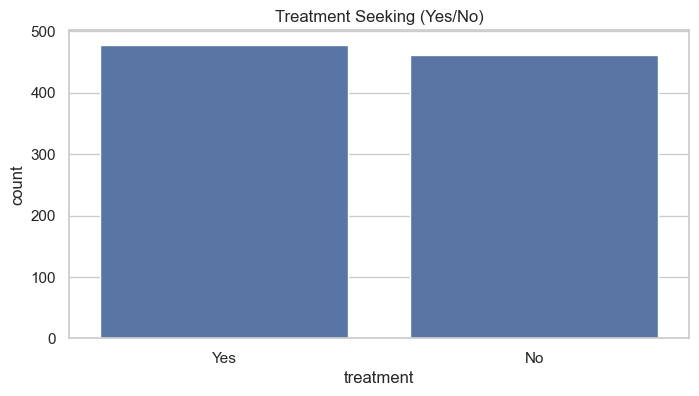

In [6]:
# Treatment Seeking Count
plt.figure(figsize=(8, 4))
sns.countplot(x='treatment', data=df)
plt.title('Treatment Seeking (Yes/No)')
plt.show()


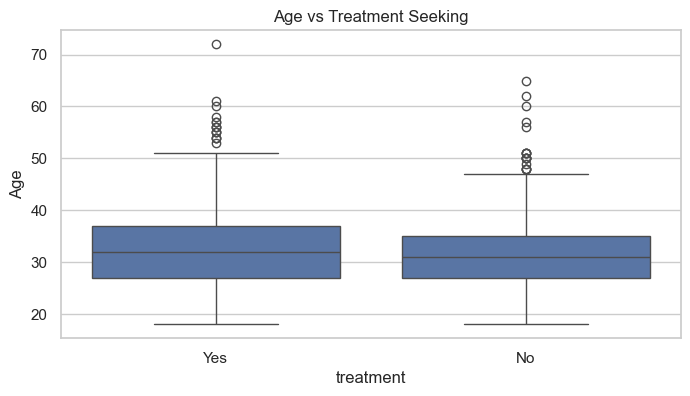

In [10]:
# Age vs Treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Age vs Treatment Seeking')
plt.show()


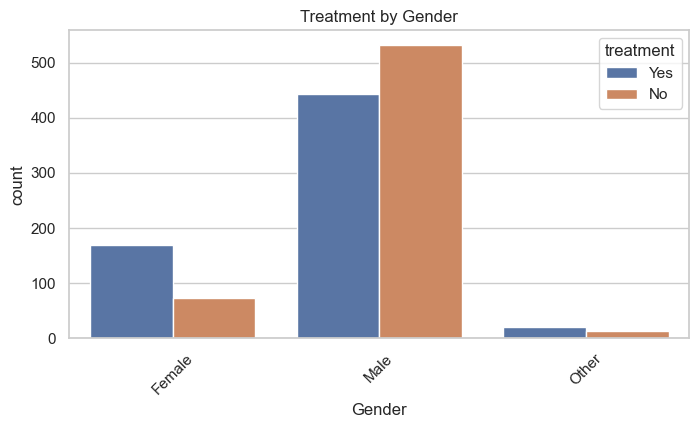

In [11]:
# Gender vs Treatment
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Treatment by Gender')
plt.xticks(rotation=45)
plt.show()


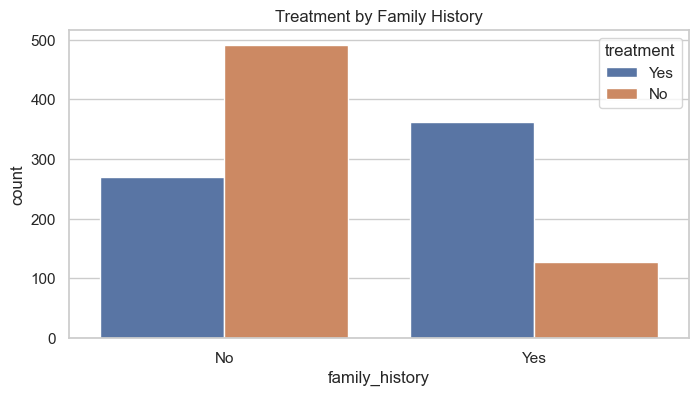

In [12]:
# Family History vs Treatment
plt.figure(figsize=(8, 4))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Treatment by Family History')
plt.show()


In [7]:
# Filter data to only include respondents from the United States
df_us = df[df['Country'] == 'United States'].copy()


In [8]:
# 📥 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')


In [9]:
# 📂 Step 2: Load the Cleaned Dataset
df = pd.read_csv('../data/final/survey_cleaned.csv')
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,Il,No,No,Yes,Often,6-25,...,Yes,Somewhat Easy,No,No,Some Of Them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.0,Male,United States,In,No,No,No,Rarely,More Than 1000,...,Don'T Know,Don'T Know,Maybe,No,No,No,No,No,Don'T Know,No
2,2014-08-27 11:29:44,32.0,Male,Canada,Not Applicable,No,No,No,Rarely,6-25,...,Don'T Know,Somewhat Difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,Not Applicable,No,Yes,Yes,Often,26-100,...,No,Somewhat Difficult,Yes,Yes,Some Of Them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.0,Male,United States,Tx,No,No,No,Never,100-500,...,Don'T Know,Don'T Know,No,No,Some Of Them,Yes,Yes,Yes,Don'T Know,No


In [10]:
# 🇺🇸 Step 3: Keep only U.S. respondents
df_us = df[df['Country'] == 'United States'].copy()


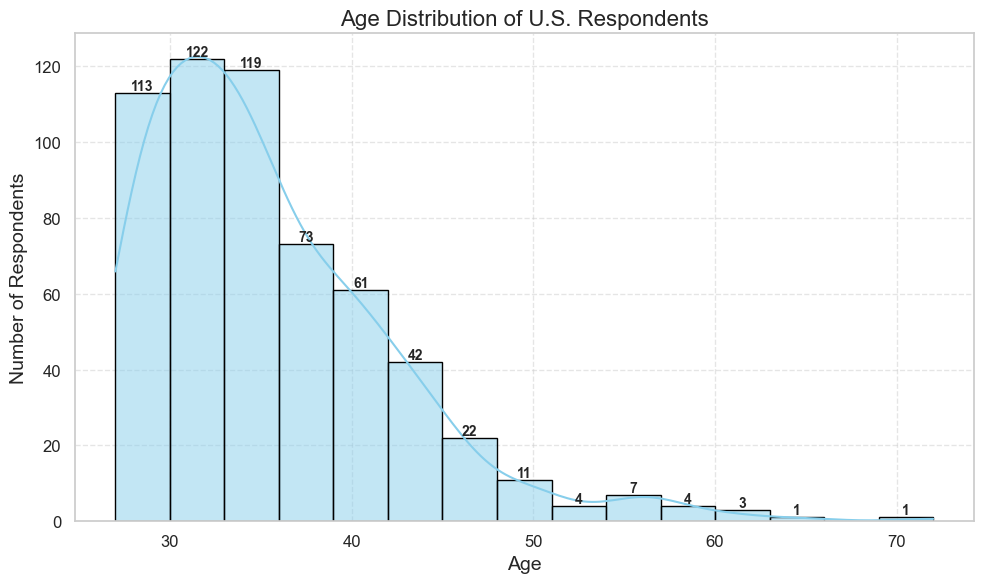

In [18]:
#  Age Distribution 
plt.figure(figsize=(10, 6))  
ax = sns.histplot(df_us['Age'], kde=True, bins=15, color='skyblue', edgecolor='black')

# Add count labels above each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate bars that are visible
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and formatting
plt.title('Age Distribution of U.S. Respondents', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



C:\Users\PC\AppData\Local\Temp\ipykernel_15280\332413131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df_us, palette=['#a6cee3', '#fdbf6f'], edgecolor='black')


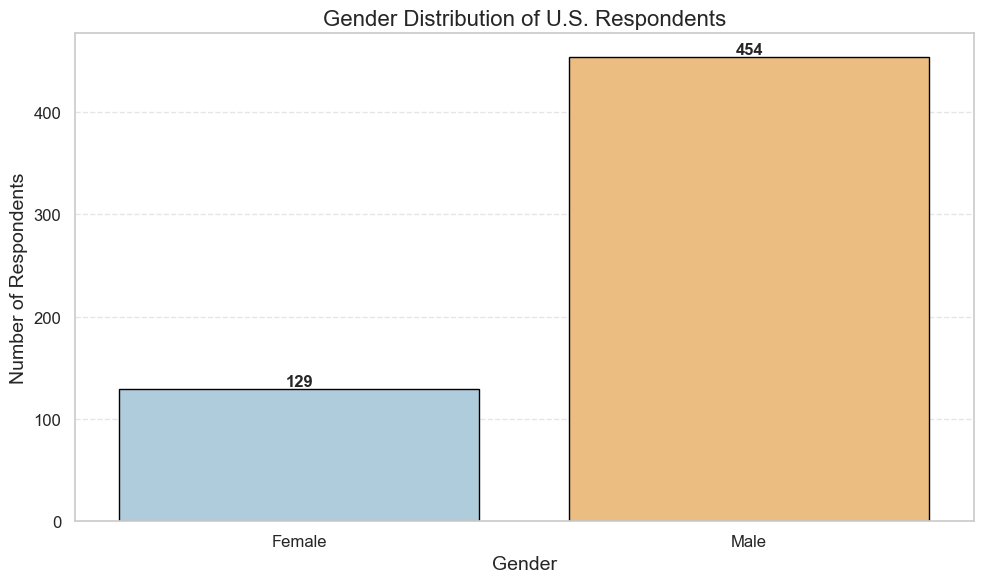

In [17]:
#  Gender Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=df_us, palette=['#a6cee3', '#fdbf6f'], edgecolor='black')

# Add exact value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatting
plt.title('Gender Distribution of U.S. Respondents', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




C:\Users\PC\AppData\Local\Temp\ipykernel_15280\4268380161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='treatment', data=df_us, palette='muted', edgecolor='black')


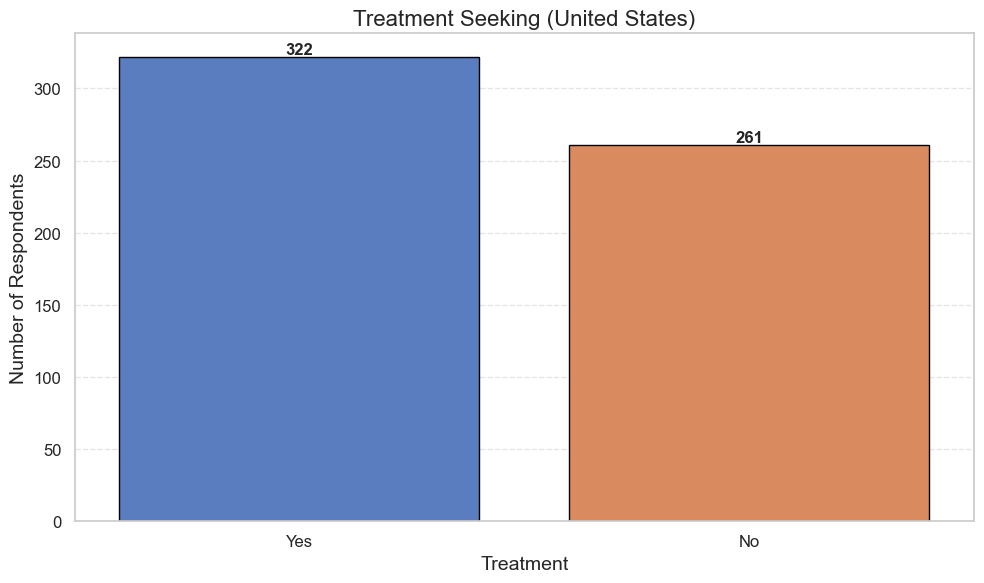

In [21]:
#  Treatment Seeking (U.S.) 
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='treatment', data=df_us, palette='muted', edgecolor='black')

# Add labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatting
plt.title('Treatment Seeking (United States)', fontsize=16)
plt.xlabel('Treatment', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_15280\2126012945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='treatment', y='Age', data=df_us, palette='Set2')


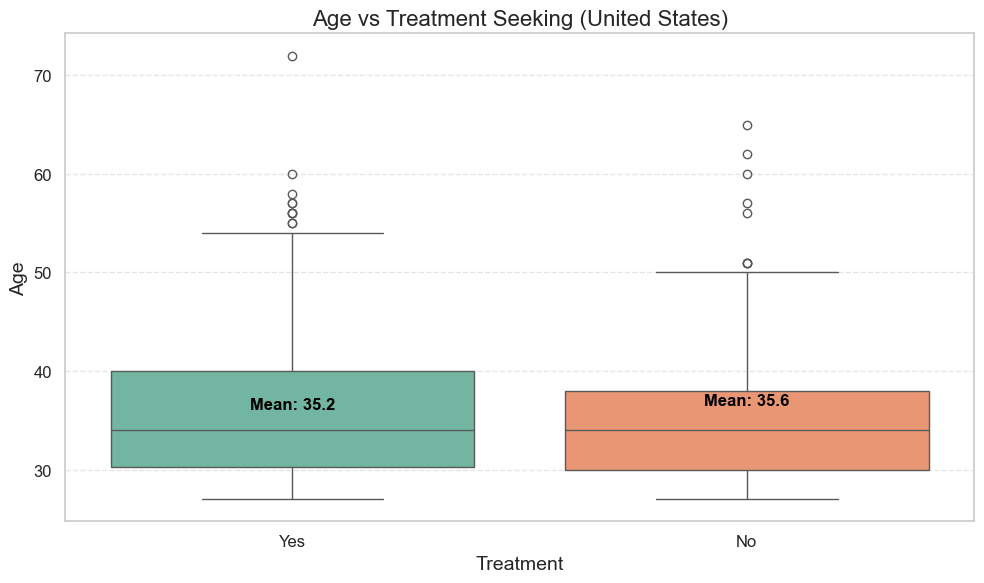

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='treatment', y='Age', data=df_us, palette='Set2')

# Add mean labels
means = df_us.groupby('treatment')['Age'].mean()
for i, (label, mean) in enumerate(means.items()):
    ax.text(i, mean + 1, f'Mean: {mean:.1f}', ha='center', fontsize=12, weight='bold', color='black')

# Styling
plt.title('Age vs Treatment Seeking (United States)', fontsize=16)
plt.xlabel('Treatment', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


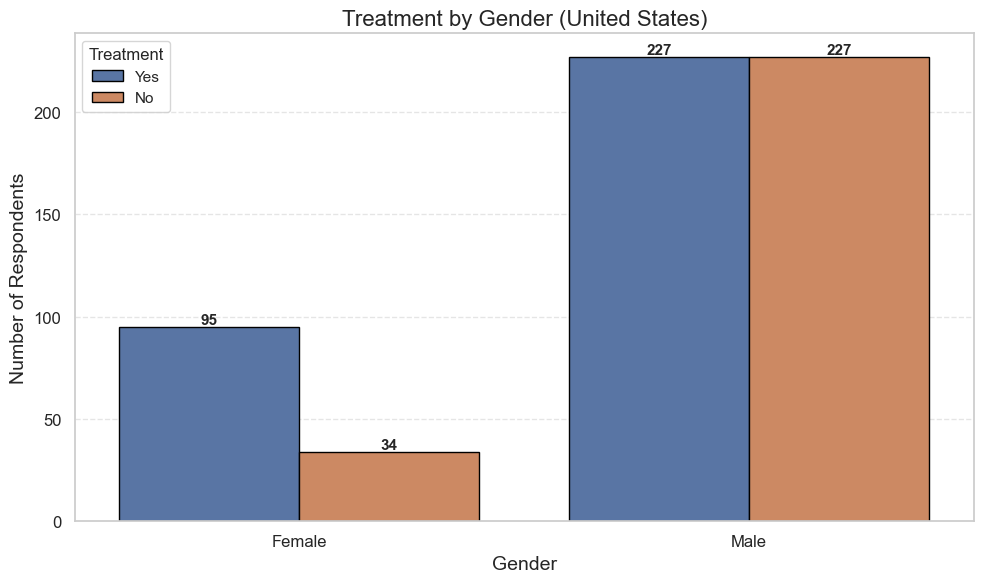

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='treatment', data=df_us, 
                   palette=['#4c72b0', '#dd8452'], edgecolor='black')

# Add value labels to each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Titles and formatting
plt.title('Treatment by Gender (United States)', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', title_fontsize=12, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
